In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
%matplotlib inline

In [2]:
x_data = np.linspace(0,10,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
y_ture = (0.5 * x_data) + 5 + noise

In [5]:
x_df = pd.DataFrame(data=x_data, columns=['X'])
y_df = pd.DataFrame(data=y_ture, columns=['Y'])

In [6]:
y_df.head()

,Y
0,3.263172
1,3.996481
2,5.816637
3,5.385418
4,4.656305


In [7]:
my_data = pd.concat([x_df,y_df], axis=1)

In [8]:
my_data.head()

,X,Y
0,0.00000,3.263172
1,0.00001,3.996481
2,0.00002,5.816637
3,0.00003,5.385418
4,0.00004,4.656305


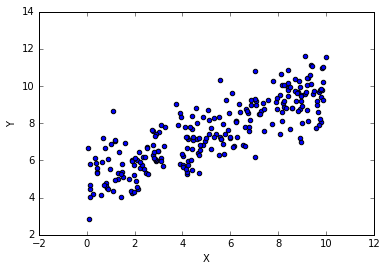

In [11]:
my_data.sample(n=250).plot(kind='scatter',x='X',y='Y')

In [14]:
batch_size = 8
np.random.randn(2)

array([-0.65020038, -0.56228182])

In [16]:
m = tf.Variable(-0.65)
b = tf.Variable(-0.56)

In [17]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [18]:
y_model = m * xph + b

In [19]:
type(y_model)

tensorflow.python.framework.ops.Tensor

In [20]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [22]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [23]:
init = tf.global_variables_initializer()

In [24]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    for i in range(batches):
        rand_id = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_id], yph:y_ture[rand_id]}
        sess.run(train, feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [25]:
print(model_m, model_b)

(0.49992847, 4.9005637)


In [26]:
print(rand_id)

[705796 555810 364509 163474 407503 431969  70613 894455]
